In [1]:
import torch
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import scipy as sp
import scipy.ndimage
from cyclic_gps.models import LEGFamily
from cyclic_gps.data_utils import time_series_dataloader
import matplotlib.pyplot as plt

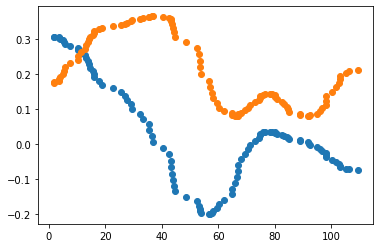

In [2]:
num_datapoints = 100
sample1_ts = torch.empty(num_datapoints)
sample1_ts = torch.cumsum(sample1_ts.exponential_(lambd=1) + 0.01, dim=0)
sample1_vals = torch.tensor(
    sp.ndimage.gaussian_filter1d(torch.randn(num_datapoints), 10, axis=0)[:, None]
)
sample2_vals = torch.tensor(
    sp.ndimage.gaussian_filter1d(torch.randn(num_datapoints), 10, axis=0)[:, None]
)
vals = torch.cat([sample1_vals, sample2_vals], dim=-1)

assert vals.shape == (num_datapoints, 2)
assert sample1_ts.shape == (num_datapoints,)

plt.scatter(sample1_ts, vals[:, 0])
plt.scatter(sample1_ts, vals[:, 1])

In [4]:
# generate torch dataset
dataset = time_series_dataloader(sample1_ts.unsqueeze(0), vals.unsqueeze(0))
example = dataset[0]
assert torch.allclose(example[0], sample1_ts.unsqueeze(0)) # we're getting our data plus one batch element
dl = DataLoader(dataset=dataset, batch_size=1)


In [5]:
RANK = 5
MAX_EPOCHS = 100
LEG_model = LEGFamily(rank=RANK, obs_dim=vals.shape[1], train=True)

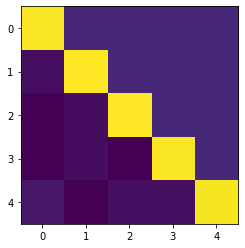

In [10]:
plt.imshow(LEG_model.N.detach().numpy())

In [6]:
trainer = pl.Trainer(max_epochs=MAX_EPOCHS)
trainer.fit(model=LEG_model, train_dataloaders=dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Missing logger folder: /Users/danbiderman/Dropbox/Columbia/1.Dan/Research/cyclic-gps/cyclic_gps/lightning_logs

  | Name | Type | Params
------------------------------
------------------------------
0         Trainable params
0         Non-trainable params
0         Total params
0.000     Total estimated model params size (MB)
/Users/danbiderman/miniconda3/envs/cyclic-gps/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/danbiderman/miniconda3/envs/cyclic-gps/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training s

Epoch 1:   0%|          | 0/1 [00:00<?, ?it/s, loss=-1.65, v_num=0]        

/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/cyclic-gps/cyclic_gps/cyclic_reduction.py:233: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  torch.triangular_solve(input=Os_even_T, A=Ks_even[:N2], upper=False)[0], 1, 2


tensor(-1.6819, grad_fn=<DivBackward0>)
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 13.70it/s, loss=-2.99, v_num=0]
